In [3]:
from sklearn.datasets import load_iris

In [6]:
data = load_iris()

In [8]:
type(data)

sklearn.utils.Bunch

In [10]:
import pandas as pd
iris = pd.DataFrame(data.data, columns=data.feature_names)

In [11]:
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
from sklearn.cluster import KMeans

In [14]:
#Create a KMeans model by specifying the number of clusters
model = KMeans(n_clusters=3)

In [15]:
model.fit(iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
#now we will preidct using the model ont hese same samples
labels=model.predict(iris)

In [17]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


**Cluster labels for new samples**

1. New samples can be assigned to existing labels 
2. KMeans does this by remembering the **mean of each cluster (the centroids)**
3. Find the nearest centroid to each new sample

If you get new sample say new_samples. Cluster them by using:
new_labels = model.predict(new_samples)

**Clustering can be visualised by scatter plot.** Color points by cluster labels

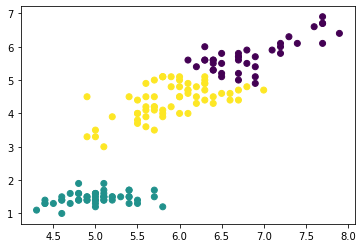

In [21]:
#plotting sepal length and petal length
import matplotlib.pyplot as plt
xs = iris['sepal length (cm)']
ys = iris['petal length (cm)']
plt.scatter(xs, ys, c = labels)
plt.show()

#### Let's compute coordinates of cluster centroids

In [22]:
centroids = model.cluster_centers_

In [23]:
centroids

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Above array gives centroids for each feature. We need to plot centroid for sepal length and petal length so we will access them below:

In [24]:
centroids_x = centroids[:, 0]
centroids_y = centroids[:,2]

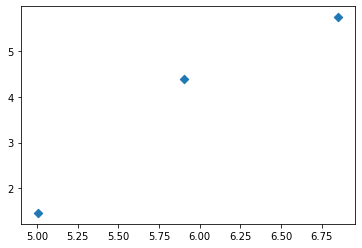

In [26]:
plt.scatter(centroids_x, centroids_y, marker = 'D')
plt.show()

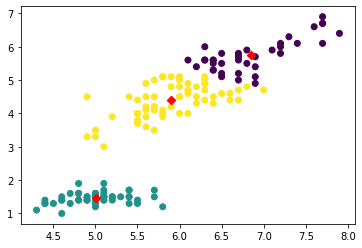

In [28]:
plt.scatter(xs, ys, c = labels)
plt.scatter(centroids_x, centroids_y, marker = 'D', color='red')
plt.show()

**The clustering looks great! But how can we be sure that 3 clusters is the correct choice? How can we evaluate the quality of a clustering?**

### Cross tabulation
pd.crosstab(df['col1], df[col2])

To evaluate quality by only using samples and cluster labels, we calculate inertia and then plot different cluster numbers and their inertia and then choose the K value at the elbow of the plot

In [30]:
print(model.inertia_)

78.85144142614601


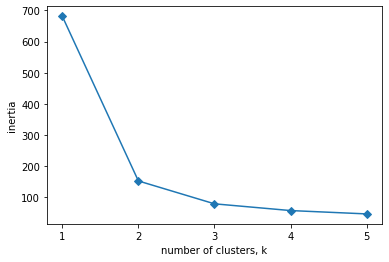

In [35]:
ks = range(1, 6)
inertias=[]
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(iris)
    inertias.append(model.inertia_)
plt.plot(ks, inertias, '-D')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

**The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.**

### T-SNE

In [ ]:
Iris has 4 measurements (features), so samples are 4 dimensional